# Skin detection

In [17]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Prima foto

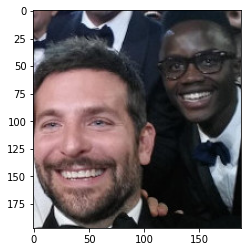

In [18]:
img = cv2.imread('images/BC.jpeg') 

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img);

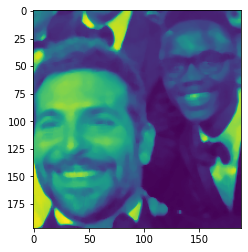

In [19]:
img = cv2.imread('images/BC.jpeg') 

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)

plt.imshow(img1);

# sogliatura

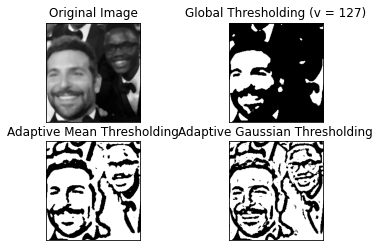

In [3]:
ret,th1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
th3 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img1, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# HSV 

In [6]:
#RGB: (141, 85, 36)
#RGB: (255, 219, 172)

#HSV: (28, 74, 55)
#HSV: (33, 32, 100)

#YCrCb: (0, 133, 80)
#YCrCb: (80, 173, 120)

#converting to HSV
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 36, 40],np.uint8)
upper = np.array([61, 160, 255],np.uint8)

#create skin mask
skinMaskHSV = cv2.inRange(HSV_img, lower, upper)

# blur the mask to help remove noise
skinMaskHSV = cv2.GaussianBlur(skinMaskHSV, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV = cv2.erode(skinMaskHSV, kernel, iterations =0)
skinMaskHSV = cv2.dilate(skinMaskHSV, kernel, iterations =2)

# apply the mask to the frame
HSV_skin = cv2.bitwise_not(img, mask = skinMaskHSV)
HSV_skin = cv2.bitwise_not(HSV_skin, mask = None)
HSV_skin = cv2.cvtColor(HSV_skin, cv2.COLOR_BGR2RGB)

# YCrCb

In [7]:
#set the parameters to detect skin color
lower= np.array([11, 122, 129],np.uint8)
upper= np.array([161, 155, 155],np.uint8)

#get image
YCrCb_img = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb = cv2.inRange(YCrCb_img , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb = cv2.GaussianBlur(skinMaskYCrCb, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb = cv2.dilate(skinMaskYCrCb, kernel, iterations = 2)
skinMaskYCrCb = cv2.erode(skinMaskYCrCb, kernel, iterations = 3)

#applies the mask to the image
YCrCb_skin = cv2.bitwise_not(img, mask = skinMaskYCrCb)
YCrCb_skin = cv2.bitwise_xor(YCrCb_skin, img, mask = None)

#convert the image into RGB
YCrCb_skin = cv2.cvtColor(YCrCb_skin, cv2.COLOR_BGR2RGB)


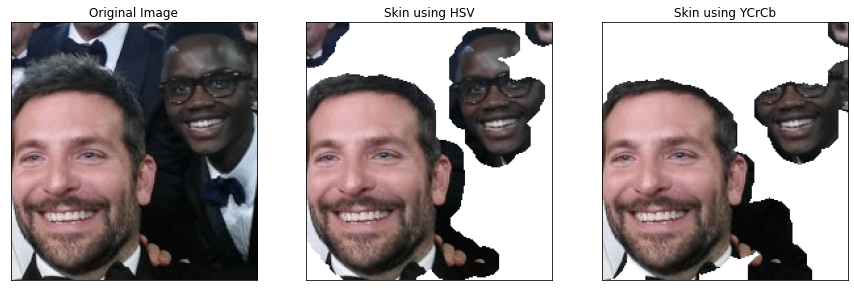

In [8]:
plt.figure(figsize=(15,5))

titles = ['Original Image', 'Skin using HSV',
            'Skin using YCrCb']

images = [RGB_img, HSV_skin, YCrCb_skin]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Seconda foto

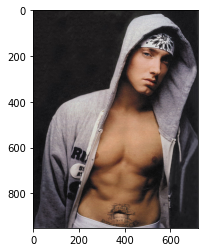

In [9]:
img2 = cv2.imread('images/Eminem.jpg') 

img1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)

RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_img2);

# HSV

In [10]:
#converting to HSV
HSV_img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 46, 40],np.uint8)
upper = np.array([61, 180, 220],np.uint8)

#create skin mask
skinMaskHSV2 = cv2.inRange(HSV_img2, lower, upper)

# blur the mask to help remove noise
skinMaskHSV2 = cv2.GaussianBlur(skinMaskHSV2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV2 = cv2.erode(skinMaskHSV2, kernel, iterations =1)
skinMaskHSV2 = cv2.dilate(skinMaskHSV2, kernel, iterations =1)

# apply the mask to the frame
HSV_skin2 = cv2.bitwise_not(img2 , mask = skinMaskHSV2)
HSV_skin2 = cv2.bitwise_not(HSV_skin2, mask = None)
HSV_skin2 = cv2.cvtColor(HSV_skin2, cv2.COLOR_BGR2RGB)

# YCrCb

In [11]:
#set the parameters to detect skin color
lower= np.array([11, 100, 124],np.uint8)
upper= np.array([255, 173, 145],np.uint8)

#get image
YCrCb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb2 = cv2.inRange(YCrCb_img2 , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb2 = cv2.GaussianBlur(skinMaskYCrCb2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb2 = cv2.erode(skinMaskYCrCb2, kernel, iterations = 1)
skinMaskYCrCb2 = cv2.dilate(skinMaskYCrCb2, kernel, iterations = 1)

#applies the mask to the image
YCrCb_skin2 = cv2.bitwise_not(img2, mask = skinMaskYCrCb2)
YCrCb_skin2 = cv2.bitwise_xor(YCrCb_skin2, img2, mask = None)

#convert the image into RGB
YCrCb_skin2 = cv2.cvtColor(YCrCb_skin2, cv2.COLOR_BGR2RGB)

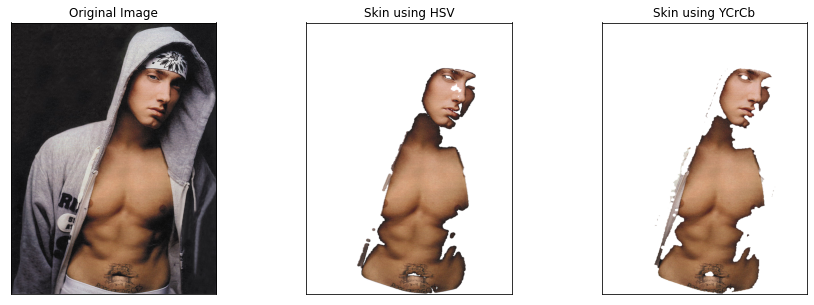

In [12]:
plt.figure(figsize=(15,5))

titles = ['Original Image', 'Skin using HSV',
            'Skin using YCrCb']

images = [RGB_img2, HSV_skin2, YCrCb_skin2]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Calcolo della media

### dei valori RGB prese un'insieme di immagini raffiguranti la pelle in diverse tonalità

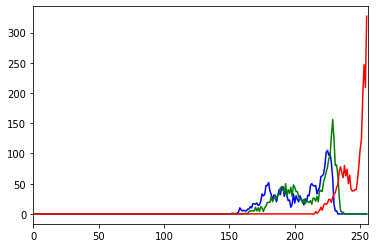

In [20]:
img = cv2.imread('images/pelle1.jpg')
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

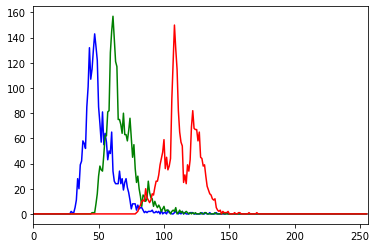

In [21]:
img = cv2.imread('images/pelle2.jpg')
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

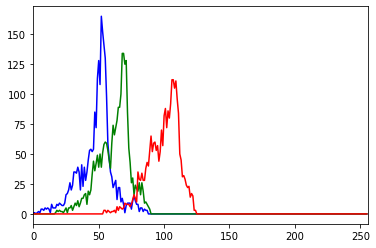

In [22]:
img = cv2.imread('images/pelle3.jpg')
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()